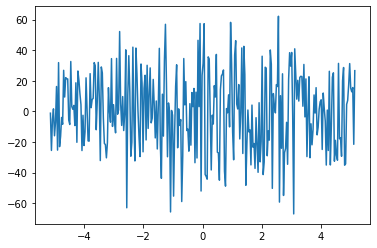

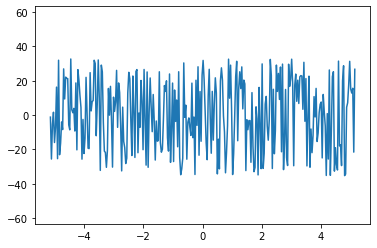

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def padded_sin(x, n):
    '''Piecewise function that is sin(nx) over [-pi, pi] and 0 elsewhere'''
    if x <= -np.pi or x>= np.pi: return float(0)
    else: return np.sin(n*x)

vsignal = np.vectorize(padded_sin)

#Generate
x = np.linspace(-(np.pi+2), np.pi+2, 300)

#Generate noise, mean shift it to be about 0

#Generate fake signal
max_n = 1000000
num_n = 1000
freqs = np.random.randint(-max_n, max_n, size=num_n)

y = vsignal(x, freqs[0])
for f in freqs[1:]:
    y += vsignal(x, f)
    
noise = np.max(y) * np.random.rand(len(x))
noise -= np.mean(noise)

y += noise
    
#Plot fake signal
plt.plot(x, y)
plt.show()

#Plot noise
plt.plot(x, noise)
plt.ylim(-(np.max(y)+1), np.max(y)+1) #Use about the same range for y-axis as fake signal
plt.show()

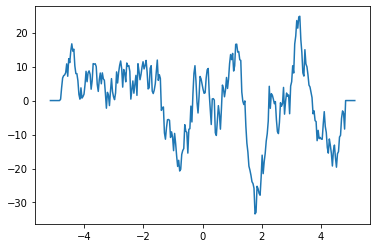

In [148]:
def moving_average(signal, n):
    out = []
    for i in range(n, len(signal)-n):
        out.append(np.sum(signal[i-n:i+n]) / n)
        
    return np.pad(np.array(out), (n,n), 'constant', constant_values=(0,0))

plt.plot(x, moving_average(y, 10))
plt.show()

In [149]:
#Integrated IEMG
def iemg(signal):
    return np.sum(np.abs(signal))

#Mean absolute value
def mav(signal):
    return np.sum(np.abs(signal)) / len(signal)

#Variance
def var(signal):
    return np.sum(np.square(signal)) / (len(signal) - 1)

#Root mean square
def rms(signal):
    return np.sqrt(np.sum(np.square(signal)) / len(signal))

#Print results
features = [iemg, mav, var, rms]
feature_names = ["imeg", "mav", "var", "rms", ]

l = [0,1]
start, stop = int(l[0] * len(x)), int(l[1] * len(x))

for i in range(len(features)):
    print(f'{feature_names[i]} - noise: {features[i](noise[start:stop])}, signal: {features[i](y[start:stop])}, averaged signal: {features[i](moving_average(y, 10)[start:stop])}')

imeg - noise: 5257.737904907388, signal: 6351.197593945979, averaged signal: 2440.8418444900217
mav - noise: 17.52579301635796, signal: 21.170658646486597, averaged signal: 8.136139481633405
var - noise: 409.4603588983784, signal: 669.1318046725236, averaged signal: 109.77828703398036
rms - noise: 20.20137349378462, signal: 25.82443349472772, averaged signal: 10.46003630063174
